In [14]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [74]:
df = pd.read_csv('SelectRecords_EndTime_subset_800m_hockey.csv')

In [75]:
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,...,usertype,birth year,gender,startdate,stopdate,Event_type,End_Time,E_Time,TripStartHM,EventEndHM
0,0,397,21:51:17,21:57:54,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,365,Fulton St & Grand Ave,...,Subscriber,1970.0,1,2016-01-01,2016-01-01,NaN,2017-12-06 20:54:00,20:54:00,21.850000,20.9
1,3,705,20:58:36,21:10:21,274,Lafayette Ave & Fort Greene Pl,40.686919,-73.976682,418,Front St & Gold St,...,Subscriber,1988.0,2,2016-01-03,2016-01-03,NaN,2017-12-06 20:54:00,20:54:00,20.966667,20.9
2,4,687,20:58:58,21:10:25,274,Lafayette Ave & Fort Greene Pl,40.686919,-73.976682,418,Front St & Gold St,...,Subscriber,1989.0,2,2016-01-03,2016-01-03,NaN,2017-12-06 20:54:00,20:54:00,20.966667,20.9
3,5,292,21:19:57,21:24:49,397,Fulton St & Clermont Ave,40.684157,-73.969223,421,Clermont Ave & Park Ave,...,Subscriber,1984.0,1,2016-01-03,2016-01-03,NaN,2017-12-06 20:54:00,20:54:00,21.316667,20.9
4,10,690,21:12:22,21:23:52,467,Dean St & 4 Ave,40.683125,-73.978951,120,Lexington Ave & Classon Ave,...,Subscriber,1987.0,1,2016-01-05,2016-01-05,NaN,2017-12-06 20:54:00,20:54:00,21.200000,20.9


In [76]:
df = df.replace(np.nan,'no-event',regex=True)
df.groupby('Event_type')['EventEndHM'].mean()

Event_type
hockey      20.908387
no-event    20.900000
Name: EventEndHM, dtype: float64

In [77]:
data = pd.DataFrame(df.groupby(['startdate','Event_type']).size())
data.reset_index(inplace=True)
data.columns = ['startdate','Type','Count']
data.head()

,startdate,Type,Count
0,2016-01-01,no-event,1
1,2016-01-03,no-event,3
2,2016-01-05,no-event,5
3,2016-01-07,no-event,12
4,2016-01-09,no-event,4


In [78]:
data[data['Type'] <> 'no-event']

,startdate,Type,Count
42,2016-03-08,hockey,16
50,2016-03-21,hockey,9
200,2016-09-26,hockey,31
207,2016-10-03,hockey,48
211,2016-10-16,hockey,33
213,2016-10-18,hockey,45
215,2016-10-21,hockey,31
216,2016-10-23,hockey,38
218,2016-10-26,hockey,56
220,2016-10-30,hockey,22


In [79]:
data['startdate'] = pd.to_datetime(data['startdate'])

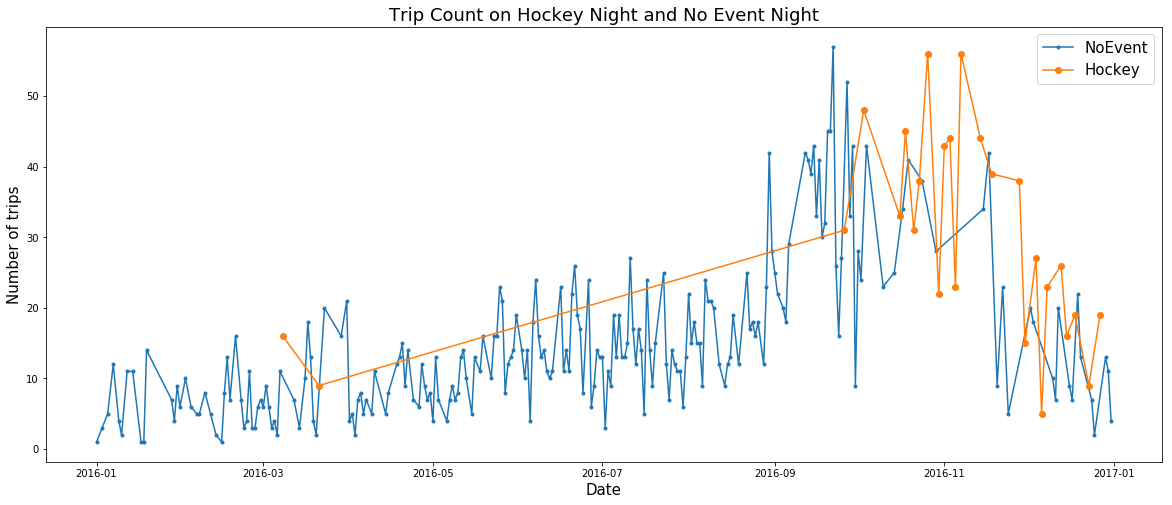

In [81]:
pl.figure(figsize=(20,8))
pl.plot(data[data['Type'] == 'no-event']['startdate'],data[data['Type'] == 'no-event']['Count'],'.-',label='NoEvent')
pl.plot(data[data['Type'] <> 'no-event']['startdate'],data[data['Type'] <> 'no-event']['Count'],'o-',label='Hockey')
#pl.annotate
pl.legend(fontsize=15)
pl.xlabel('Date',size=15)
pl.ylabel('Number of trips',size=15)
pl.title('Trip Count on Hockey Night and No Event Night',size=18)
#pl.annotate(data[data['Type'] == 'no-event']['startdate'], xy=(data[data['Type'] <> 'no-event']['startdate'],data[data['Type'] <> 'no-event']['Count']), textcoords='offset points',
#           rotation=0, fontsize=70, color='white')
pl.savefig('hockey_compare.png',dpi=300)

In [82]:
lm = smf.ols(formula='Count ~ C(Type, Treatment(reference="no-event"))', data=data).fit()

In [83]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     43.28
Date:                Wed, 06 Dec 2017   Prob (F-statistic):           2.69e-10
Time:                        21:05:56   Log-Likelihood:                -976.91
No. Observations:                 256   AIC:                             1958.
Df Residuals:                     254   BIC:                             1965.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             14.7870      0.728     20.323      0.000      13.354      16.220
C(Type, Treatment(reference="no-event"))[T.hockey]    15.0207      2.283      6.579      0.000      10.524      19.517
==============================================================================
Omnibus:                       49.689   Durbin-Watson:                   0.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.575
Skew:                           1.144   Prob(JB):                     3.88e-17
Kurtosis:                       4.359   Cond. No.                         3.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
event = pd.read_csv('events2016_subset_end.csv')

In [39]:
event.head()

,Unnamed: 0,Unnamed: 0.1,EventID,Event_type,Name,Start_Time,Start_Hour,End_Time,End_Hour,weekday,date
0,1,168,1490000000000000,basketball,Harlem Globetrotters,2016-01-02 19:00:00,19,2016-01-02 21:00:00,21,False,2016-01-02
1,2,167,201000000000000,basketball,Brooklyn Nets vs. Boston Celtics,2016-01-04 19:30:00,19,2016-01-04 21:30:00,21,True,2016-01-04
2,3,166,1080000000000000,basketball,Brooklyn Nets vs. Toronto Raptors,2016-01-06 19:30:00,19,2016-01-06 21:30:00,21,True,2016-01-06
3,4,165,1390000000000000,basketball,Brooklyn Nets vs. Orlando Magic,2016-01-08 19:30:00,19,2016-01-08 21:30:00,21,True,2016-01-08
4,5,164,1230000000000000,basketball,Brooklyn Nets vs. San Antonio Spurs,2016-01-11 19:30:00,19,2016-01-11 21:30:00,21,True,2016-01-11


In [42]:
event['date'] = pd.to_datetime(event['Start_Time']).dt.date.astype(str)

In [44]:
event[event['date'] == "2016-10-25"]

,Unnamed: 0,Unnamed: 0.1,EventID,Event_type,Name,Start_Time,Start_Hour,End_Time,End_Hour,weekday,date
86,106,63,1230000000000000,concert,Sia: Nostalgic For The Present Tour,2016-10-25 19:00:00,19,2016-10-25 22:00:00,22,True,2016-10-25
